# 1. Title, Name and References

## Factors of influence in the Price of Used Cars in The Uk

#### Introduction

This project’s goal is to analyse what are the independent variables that can cause an impact over the price (outcome variable) of resale used car through different regression models and exercises. The dataset used for the study was obtained from the UK’s craigslist website, containing an initial shape of 4006 values rows, and 11 variables columns including the car model, year, price, transmission type, two columns for mileage travelled, two columns for fuel type, two columns for engine size, and the advertisement reference number, also it seems to be a cropped version considering only the car model Mercedes Benz C Class. 
The methodology consisted of data cleansing and preparation, exploratory data analysis, construction of hypothesis and features observation, a simple linear regression model, linear regression model with Lasso/Ridge, and a polynomial regression exercise with Lasso/Ridge.

#### Team member
1. Ngoc Chau Tran - 300307368
2. Leozítor Floro de Souza - 300334919
3. Carolina Henrique de Melo Louback - 300306289

#### Reference
* [Predicting Boston House Prices](https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d)
* [Polynomial Regresison](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)
* Class Notes

# 2. Library import and data loading

In [1]:
# all imports required for the project
#!pip install --upgrade scikit-learn pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
%matplotlib inline

#### Brief Explanation of data preparation

In order to clean the data, the first action was to drop the rows with missing values as well as the columns that were not going to be used in the analysis. Secondly, the columns “price” and  “mileage” had special characters removed to enable converting their data types from string to numerical along with the numerical conversion for columns “engine_size” and "year". The duplicated columns for mileage, engine type, and fuel type were merged into one of each by filling the null values of the most complete column with the values from the least complete. Finaly, the categorical variables were processed by obtaining their dummy variables. The final clean data resulted with a shape of 14 variables with 3898 data points each. 

In [2]:
#Visualize uncleaned dataset dataframe head and tail
path="unclean_data.csv"

unclean_data = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

unclean_data

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


In [3]:
#Check how many rows and columns the dataset has
#Get shape
unclean_data.shape

(4006, 11)

In [4]:
#get column data value types
unclean_data.dtypes

model            object
year            float64
price            object
transmission     object
mileage          object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

In [5]:
#Check for nan values in the dataset
unclean_data.isnull().values.any()

True

In [6]:
unclean_data.isna()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,False,False,False,False,True,False,False,False,True,True,False
1,False,False,False,False,True,False,False,False,True,True,False
2,False,False,False,False,True,False,False,False,True,True,False
3,False,False,False,False,True,False,False,False,True,True,False
4,False,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4001,False,False,False,False,False,False,False,False,False,False,False
4002,False,False,False,False,False,False,False,False,False,False,False
4003,False,False,False,False,False,False,False,False,False,False,False
4004,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Count how many nans in dataset columns
unclean_data.isna().sum()

model             99
year             102
price             99
transmission      99
mileage          198
fuel type       2677
engine size      164
mileage2         116
fuel type2       198
engine size2     198
reference         99
dtype: int64

In [8]:
#Check categorical variables (transmission, fuel type)
#transmission
unclean_data['transmission'].value_counts()

Semi-Auto    2071
Automatic    1636
Manual        199
Other           1
Name: transmission, dtype: int64

In [9]:
#fuel type
unclean_data['fuel type'].value_counts()

31        310
32        240
38        174
37        101
Diesel     83
30         76
25         65
29         57
33         50
34         29
26         25
36         17
39         17
43         13
Petrol     13
27         12
35         12
40          8
44          6
24          4
46          4
28          3
Hybrid      3
45          3
47          3
48          1
Name: fuel type, dtype: int64

# 3. Data Analysis, Preparation and Wrangling

### Professor Project Directions
Before you start, please take a look at the original csv file to find out about the data. Then, explore the dataset in your Jupyter notebook. Have a peek of the data. You should notice that the dataset is not clean. The followings are the issues that appear in the dataset:

### Step 3.1 - Handling missing values

In [10]:
#Drop rows where all values are NaN values
clean_df = unclean_data.dropna(how='all').copy()
#Reset index from dataframe
clean_df.reset_index(drop=True, inplace=True)

In [11]:
#Check how many  NaN values still exists and check data shape
clean_df.isnull().values.any()

True

In [12]:
clean_df.isna().sum()

model              0
year               3
price              0
transmission       0
mileage           99
fuel type       2578
engine size       65
mileage2          17
fuel type2        99
engine size2      99
reference          0
dtype: int64

In [13]:
clean_df.shape 

(3907, 11)

In [14]:
clean_df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


### Step 3.2 - Handling the currency symbols and comma format

In [15]:
#Replace currency symbols with empt space at price column
clean_df['price'] = clean_df['price'].str.replace('£','')
clean_df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [16]:
#Replace comma character with empt space at price column
clean_df['price'] = clean_df['price'].str.replace(',','')
clean_df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [17]:
#Change data type of price into numeric using pd.to_numeric()
clean_df['price'] = pd.to_numeric(clean_df['price'])

In [18]:
clean_df.dtypes

model            object
year            float64
price             int64
transmission     object
mileage          object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

### Step 3.3 - Handling non-valid column names

In [19]:
#Replace “fuel type”, “fuel type2”, “engine size”, and “engine size2” columns names for 
# “fuel_type”, “fuel_type2”, “engine_size” and “engine_size2” respectively.
clean_df.rename(columns={'fuel type':'fuel_type',
                          'fuel type2':'fuel_type2',
                          'engine size':'engine_size',
                          'engine size2':'engine_size2'}, 
                 inplace=True)
clean_df.head()

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


### Step 3.4 - Handling missing values in columns: fuel_type

In [20]:
#fill nan values in column fuel_type2 with values from column fuel_type
clean_df['fuel_type2'] = clean_df.fuel_type2.fillna(clean_df.fuel_type)
clean_df.head()

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",Diesel,NaN,/ad/24913660


In [21]:
clean_df.isna().sum()

model              0
year               3
price              0
transmission       0
mileage           99
fuel_type       2578
engine_size       65
mileage2          17
fuel_type2         0
engine_size2      99
reference          0
dtype: int64

In [22]:
#since fuel_type still has a lot of missing values, we can drop this column
clean_df = clean_df.drop(columns=['fuel_type'],axis=1)
clean_df.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,2,"4,500",Diesel,NaN,/ad/24913660


In [23]:
clean_df.shape

(3907, 10)

In [24]:
#Rename fuel_type2 column into fuel_type
clean_df.rename(columns={'fuel_type2':'fuel_type'},inplace=True)

### Step 3.5 - Handling missing values and comma format in columns: mileage

In [25]:
#fill nan values in column mileage with values from column mileage2
clean_df['mileage'] = clean_df.mileage.fillna(clean_df.mileage2)
clean_df.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,"1,200",2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,"1,000",1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,"5,000",2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,"4,500",2,"4,500",Diesel,NaN,/ad/24913660


In [26]:
#Replace comma character with empt space at mileage column
clean_df['mileage'] = clean_df['mileage'].str.replace(',','')
clean_df.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500,2,"4,500",Diesel,NaN,/ad/24913660


In [27]:
# drop the mileage2 column
clean_df = clean_df.drop(columns=['mileage2'],axis=1)
clean_df.head()

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200,2,Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000,1.5,Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000,2,Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500,2,Diesel,NaN,/ad/24913660


In [28]:
clean_df.shape

(3907, 9)

In [29]:
#Convert mileage data type to numerical
clean_df['mileage'] = pd.to_numeric(clean_df['mileage'],errors='coerce')

In [30]:
clean_df.dtypes

model            object
year            float64
price             int64
transmission     object
mileage         float64
engine_size      object
fuel_type        object
engine_size2     object
reference        object
dtype: object

### Step 3.6 - Handling missing values and different value standard in columns: engine_size 

In [31]:
#fill the missing values in engine_size2 with values from the engine_size column
clean_df['engine_size2']=clean_df['engine_size2'].fillna(clean_df.engine_size)
clean_df.head()

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,2,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,2,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,2,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,2,/ad/24913660


In [32]:
#convert engine_size2 column into numeric
clean_df['engine_size2'] = pd.to_numeric(clean_df['engine_size2'],errors='coerce')
clean_df['engine_size2'] = clean_df['engine_size2'].apply(lambda x: round(x/1000, 1) if x > 1000 else round(x, 1))

In [33]:
clean_df.head()

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,2.0,/ad/24913660


In [34]:
#drop column engine_size.
clean_df= clean_df.drop(columns=['engine_size'],axis=1)
clean_df.shape

(3907, 8)

In [35]:
#rename columns
clean_df.rename(columns={'engine_size2':'engine_size'},inplace=True)
clean_df.shape

(3907, 8)

### Step 3.7 - Handling wrong data type: year 

In [36]:
clean_df.dtypes

model            object
year            float64
price             int64
transmission     object
mileage         float64
fuel_type        object
engine_size     float64
reference        object
dtype: object

In [37]:
# check existing NaN values in the dataset
#We will need to drop the null values before converting the year column data type to numeric
clean_df.isna().sum()

model           0
year            3
price           0
transmission    0
mileage         4
fuel_type       0
engine_size     2
reference       0
dtype: int64

In [38]:
# remove NaN values in the dataset
clean_df = clean_df.dropna()

In [39]:
# check existing NaN values in the dataset
clean_df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuel_type       0
engine_size     0
reference       0
dtype: int64

In [40]:
# change the data type of the year column into integer format
clean_df['year'] = clean_df['year'].astype('int64')
clean_df.shape

(3898, 8)

In [41]:
clean_df.dtypes # show data type

model            object
year              int64
price             int64
transmission     object
mileage         float64
fuel_type        object
engine_size     float64
reference        object
dtype: object

### Step 3.8 - Handling unneeded columns 

In [42]:
clean_df = clean_df.drop(columns=['model', 'reference'])
clean_df.shape

(3898, 6)

In [43]:
clean_df

,year,price,transmission,mileage,fuel_type,engine_size
0,2020,30495,Automatic,1200.0,Diesel,2.0
1,2020,29989,Automatic,1000.0,Petrol,1.5
2,2020,37899,Automatic,500.0,Diesel,2.0
3,2019,30399,Automatic,5000.0,Diesel,2.0
4,2019,29899,Automatic,4500.0,Diesel,2.0
...,...,...,...,...,...,...
3902,2017,14700,Manual,31357.0,Diesel,1.6
3903,2018,18500,Automatic,28248.0,Diesel,2.1
3904,2014,11900,Manual,48055.0,Diesel,2.1
3905,2014,11300,Automatic,49865.0,Diesel,2.1


### Step 3.9 - Handling categorical data 

Now we going to do a One-Hot-encoding for the categorical variables, transforming categoric values like 'diesel', 'petrol', 'automatic' and so on to 1's and 0's in other columns.

In [44]:
# change categorial data of transmission into dummy values
transmission = pd.get_dummies(clean_df['transmission']) # to get the dummy values and store in a variable called transmission
clean_df = clean_df.join(transmission) # add the dummy values to new columns
clean_df.head()

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,Other,Semi-Auto
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0


In [45]:
# rename the column name of 'Other' (a dummy value of transmission column) into 'OtherTransmission' since fuel_type column has a dummy value named 'Other' too
clean_df.rename(columns={'Other' : 'OtherTransmission'}, inplace=True)
clean_df.head(30)

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0
5,2020,30999,Automatic,1000.0,Diesel,2.0,1,0,0,0
6,2020,35999,Automatic,500.0,Diesel,2.0,1,0,0,0
7,2019,37990,Automatic,1412.0,Petrol,3.0,1,0,0,0
8,2019,28990,Automatic,3569.0,Diesel,2.0,1,0,0,0
9,2019,28990,Automatic,3635.0,Diesel,2.0,1,0,0,0


In [46]:
# Process categories data for fuel type
fuel_type = pd.get_dummies(clean_df['fuel_type'])
clean_df = clean_df.join(fuel_type)
clean_df.head()

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,Other,Petrol
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0


In [47]:
# rename the new column name of 'Other' into 'OtherFuel' 
clean_df.rename(columns={'Other' : 'OtherFuel'}, inplace=True)
clean_df.head(30)

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0
5,2020,30999,Automatic,1000.0,Diesel,2.0,1,0,0,0,1,0,0,0
6,2020,35999,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
7,2019,37990,Automatic,1412.0,Petrol,3.0,1,0,0,0,0,0,0,1
8,2019,28990,Automatic,3569.0,Diesel,2.0,1,0,0,0,1,0,0,0
9,2019,28990,Automatic,3635.0,Diesel,2.0,1,0,0,0,1,0,0,0


In [48]:
print("Clean dataset with {} data points {} variable each.".format(*clean_df.shape))

Clean dataset with 3898 data points 14 variable each.


In [49]:
clean_df.dtypes

year                   int64
price                  int64
transmission          object
mileage              float64
fuel_type             object
engine_size          float64
Automatic              uint8
Manual                 uint8
OtherTransmission      uint8
Semi-Auto              uint8
Diesel                 uint8
Hybrid                 uint8
OtherFuel              uint8
Petrol                 uint8
dtype: object

### Step 3.10 - Saving the cleaned data into csv

In [50]:
clean_df.to_csv('cleaned_data_Group2.csv', index=False)

# 4. Exploratory Data Analysis and Visualization

In [51]:
#Observe the clean dataset statistics
clean_df.describe()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,2017.341714,23679.720369,22373.116727,2.036762,0.417394,0.051052,0.000257,0.531298,0.600051,0.038738,0.001539,0.359672
std,2.204856,8954.941562,22589.323398,0.487930,0.493192,0.220132,0.016017,0.499083,0.489950,0.192994,0.039208,0.479966
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17691.250000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14638.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32440.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Relationship between mileage and the price?

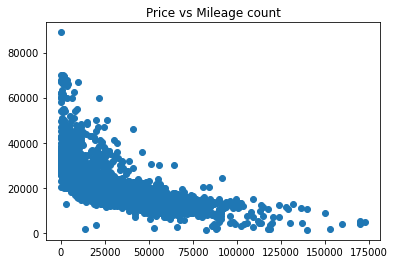

In [52]:
#Is there any relationship between the average price of used cars and the mileage count? 
plt.scatter(clean_df.mileage, clean_df.price)
plt.title('Price vs Mileage count')
plt.savefig('Price vs Mileage count.png', dpi=400, bbox_inches='tight')

#### Comments:
As illustrated, the higher the mileage count, the lower will be the price the car may cost. As an outlier, there is one data point of price over 80000 that will be removed for the analysis.

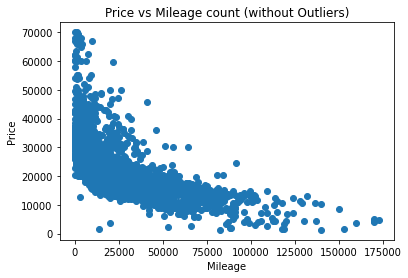

In [53]:
clean_df.drop(clean_df.loc[clean_df["price"]>80000].index, inplace=True) 
plt.scatter(clean_df.mileage, clean_df.price)
plt.title('Price vs Mileage count (without Outliers)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.savefig('Price vs Mileage count (without Outliers).png', dpi=200, bbox_inches='tight')

#### Relationship between year and the price?

Text(0.5, 1.0, 'Price vs Year')

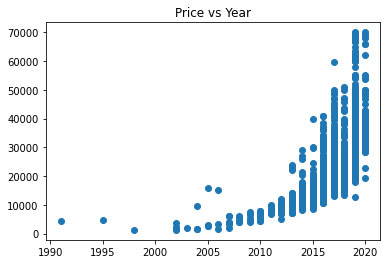

In [54]:
#Is there any relationship between the average price of used cars and the year it was manufactured?
plt.scatter(clean_df.year, clean_df.price)
plt.title('Price vs Year')
plt.savefig('Price vs Year.png', dpi=400, bbox_inches='tight')

#### Comments:
As we can see, the price is negatively affected by the increase of year value. The Older the Car, the cheaper it will cost.

#### Relationship between engine size and the price?

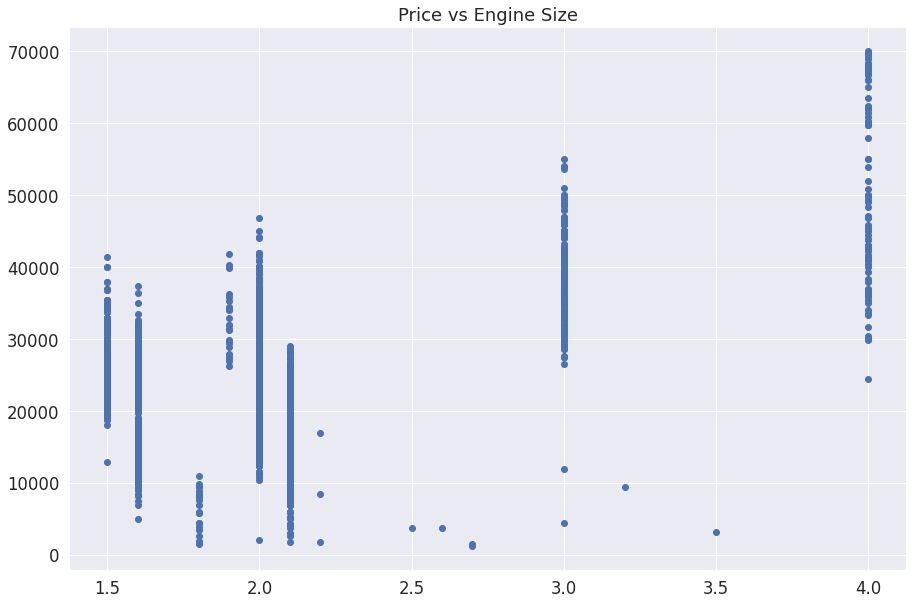

In [113]:
#Is there any relationship between the average price of used cars and the engine size?
plt.scatter(clean_df.engine_size, clean_df.price)
plt.title('Price vs Engine Size')
plt.savefig('Price vs Engine Size.png', dpi=400, bbox_inches='tight')

#### Comments:
Similarly to mileage, we can see that there is an outlier beyond point 5 where the price suddenly decreases. That could be excluded for the sake of this analysis. 

In [56]:
#Exclude outlier
clean_df.drop(clean_df.loc[clean_df["engine_size"]>5].index,inplace=True)

Text(0.5, 1.0, 'Price vs Engine Size (without outlier)')

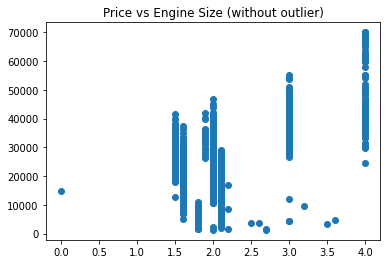

In [57]:
#Relationship plot after dropping outlier
plt.scatter(clean_df.engine_size, clean_df.price)
plt.title('Price vs Engine Size (without outlier)')
plt.savefig('Price vs Engine Size (without outlier).png', dpi=400, bbox_inches='tight')

#### Relationship between fuel type  and the price?

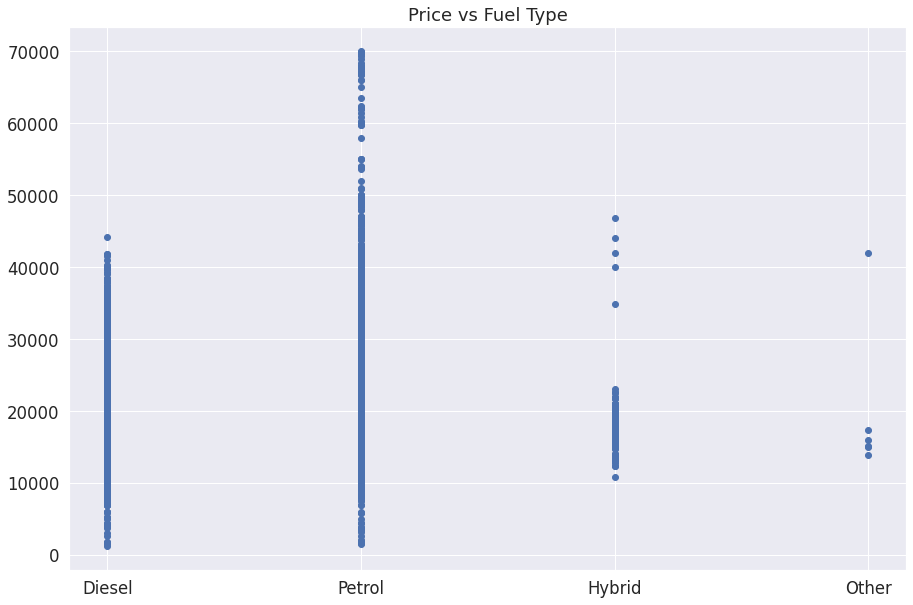

In [114]:
#Is there any relationship between the average price of used cars and the fuel type?
plt.scatter(clean_df.fuel_type, clean_df.price)
plt.title('Price vs Fuel Type')
plt.savefig('Price vs Fuel Type.png', dpi=400, bbox_inches='tight')

#### Comments:
We can observe, the car fuel type do not independently affect the price variation.

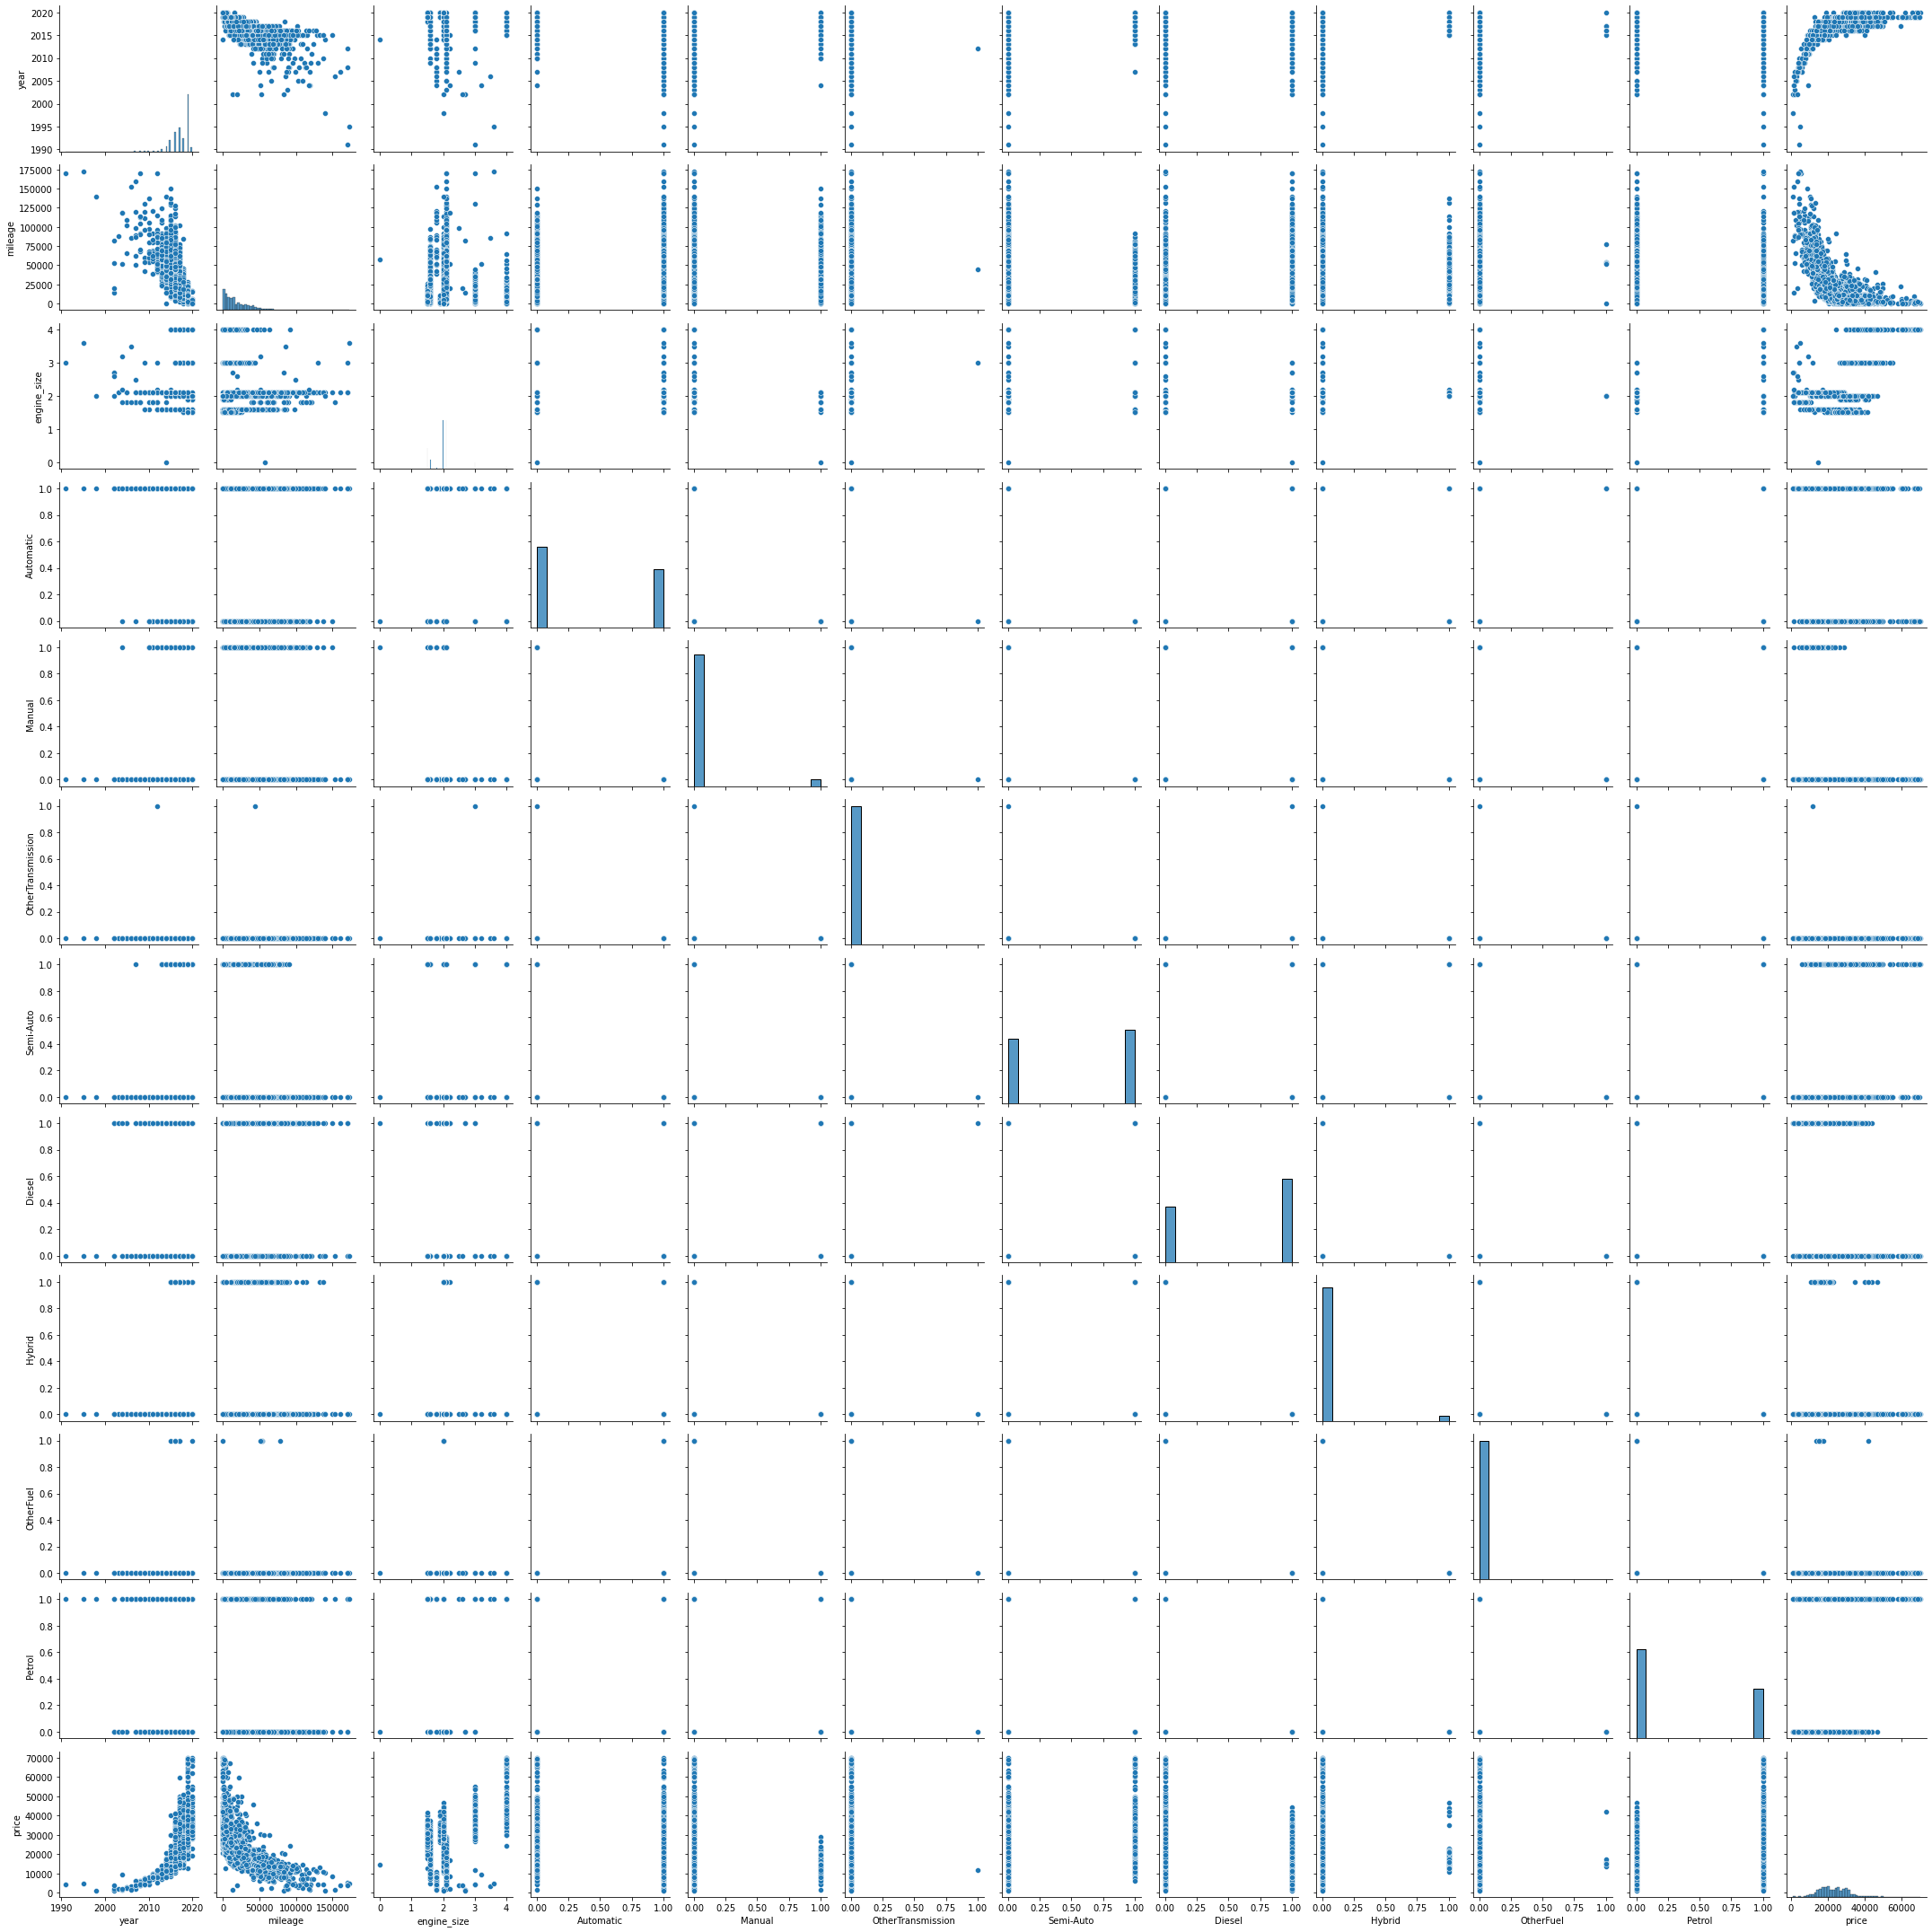

In [59]:
#More general visualizations of the data
sns.pairplot(clean_df[['year', 'mileage', 'engine_size', 'Automatic', 'Manual', 'OtherTransmission',
        'Semi-Auto', 'Diesel', 'Hybrid', 'OtherFuel', 'Petrol','price']], height=2.5)
plt.tight_layout()

In [60]:
# Obtain Correlations coefficients
clean_df.corr()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
year,1.000000,0.682994,-0.776060,-0.129176,-0.200500,-0.168941,-0.039363,0.274009,-0.143429,-0.098698,-0.009422,0.187041
price,0.682994,1.000000,-0.682491,0.413022,-0.096540,-0.242487,-0.021030,0.203181,-0.255191,-0.112566,-0.016599,0.307357
mileage,-0.776060,-0.682491,1.000000,0.089013,0.181919,0.221090,0.015870,-0.277928,0.180800,0.190922,0.045296,-0.265329
engine_size,-0.129176,0.413022,0.089013,1.000000,0.081257,-0.049206,0.035736,-0.059705,-0.004088,0.003171,-0.002235,0.003079
Automatic,-0.200500,-0.096540,0.181919,0.081257,1.000000,-0.196538,-0.013573,-0.900871,0.022723,0.089149,0.046484,-0.062957
Manual,-0.168941,-0.242487,0.221090,-0.049206,-0.196538,1.000000,-0.003727,-0.247397,0.029147,-0.046713,-0.009136,-0.010184
OtherTransmission,-0.039363,-0.021030,0.015870,0.035736,-0.013573,-0.003727,1.000000,-0.017085,0.013048,-0.003226,-0.000631,-0.011973
Semi-Auto,0.274009,0.203181,-0.277928,-0.059705,-0.900871,-0.247397,-0.017085,1.000000,-0.035747,-0.067353,-0.041876,0.067092
Diesel,-0.143429,-0.255191,0.180800,-0.004088,0.022723,0.029147,0.013048,-0.035747,1.000000,-0.247237,-0.048354,-0.917604
Hybrid,-0.098698,-0.112566,0.190922,0.003171,0.089149,-0.046713,-0.003226,-0.067353,-0.247237,1.000000,-0.007907,-0.150047


In [61]:
#Select only numericalvariables to visualize heatmap
num_var = clean_df[['year', 'mileage', 'engine_size','price']]

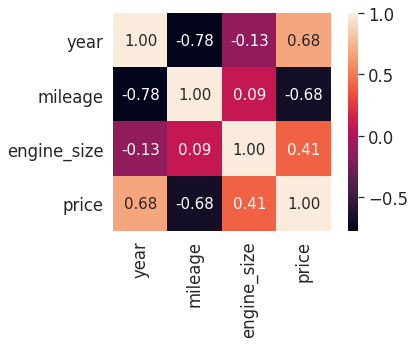

In [62]:
#Correlations heatmap
cm = np.corrcoef(num_var.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
               cbar=True,
               annot=True,
               square=True,
               fmt='.2f',
               annot_kws={'size':15},
               yticklabels=num_var.columns,
               xticklabels=num_var.columns)

#### Comments:
We can see in the heat map, there is a high negative correlation (-0.78) among the variables year and mileage,indicating the higher the year the smaller will be the milleage count; also with mileage and price (-0.68) which can imply that the higher the mileage count the smaller will be the price value. But there is a high positive correlation between year and price (0.68) which confirms the hypothesis that the newer the car the more expensive it will be.

# 5. Feature Observation and Hypothesis

In [63]:
#Observe the clean dataset statistics
clean_df.describe()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000
mean,2017.356408,23665.792589,22315.686052,2.024884,0.417138,0.051209,0.000257,0.531395,0.601904,0.038857,0.001544,0.357694
std,2.183439,8904.608344,22576.158703,0.437838,0.493150,0.220453,0.016042,0.499078,0.489568,0.193280,0.039269,0.479383
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17690.000000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14606.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32344.500000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,69995.000000,173000.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature observation

1. As we can observe here, engize_size after cleaning has value minimum of 0, it's quite illogical as no car may have. Hence, it should be cleaned.
2. there are some outliers with the year as the minimum year is 1991, while the 1st quartile of year is 2016, median is 2018, 3rd IQR is 2019, so we will drop these outliers

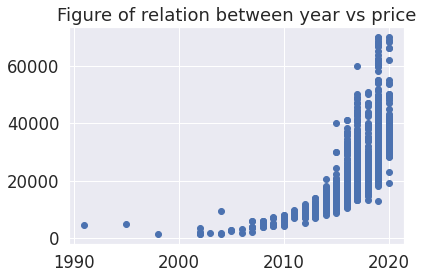

In [64]:
#Is there any relationship between the average price of used cars and the year it was manufactured?
plt.scatter(clean_df.year, clean_df.price)
plt.title('Figure of relation between year vs price')
#=> drop outlier for the year before 2000
plt.savefig('Figure of relation between year vs price.png', dpi=400, bbox_inches='tight')

In [65]:
# drop rows that has 0 value in engine_size column
clean_df.drop(clean_df.loc[clean_df["engine_size"]==0].index, inplace=True)


In [66]:
## drop rows which have value in year columns less than 2000, drop the ouliers
clean_df.drop(clean_df.loc[clean_df["year"]<2000].index, inplace=True)
clean_df

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2017,14700,Manual,31357.0,Diesel,1.6,0,1,0,0,1,0,0,0
3903,2018,18500,Automatic,28248.0,Diesel,2.1,1,0,0,0,1,0,0,0
3904,2014,11900,Manual,48055.0,Diesel,2.1,0,1,0,0,1,0,0,0
3905,2014,11300,Automatic,49865.0,Diesel,2.1,1,0,0,0,1,0,0,0


In [67]:
clean_df.describe()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000
mean,2017.374807,23683.675940,22199.560536,2.024755,0.416795,0.051005,0.000258,0.531942,0.602267,0.038897,0.001546,0.357290
std,2.089202,8890.254624,22245.106676,0.435843,0.493092,0.220036,0.016050,0.499043,0.489493,0.193376,0.039289,0.479263
min,2002.000000,1295.000000,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17699.000000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14572.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32214.500000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,69995.000000,170000.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


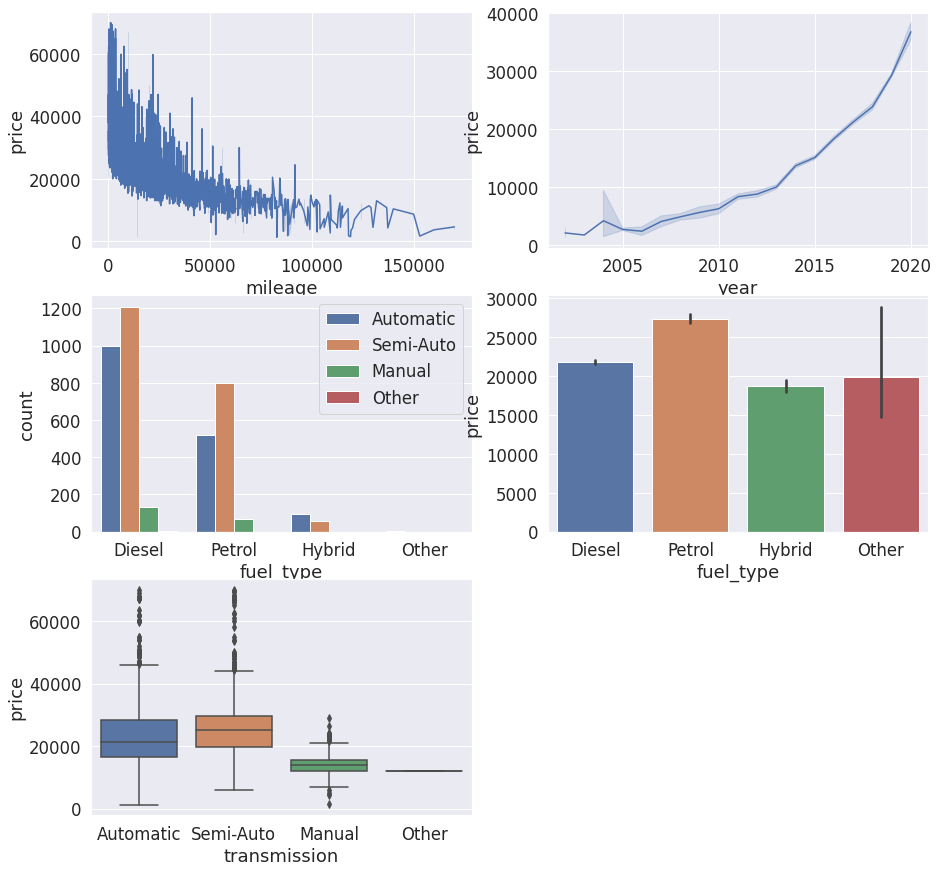

In [68]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=[15,20])
plt.subplot(421)
sns.lineplot(x='mileage',y='price',data=clean_df)

plt.subplot(422)
sns.lineplot(x='year',y='price',data=clean_df)

plt.subplot(423)
sns.countplot('fuel_type',hue='transmission',data=clean_df)
plt.legend(loc='upper right')

plt.subplot(424)
sns.barplot(x='fuel_type',y='price',data=clean_df)

plt.subplot(425)
sns.boxplot(x='transmission',y='price',data=clean_df)

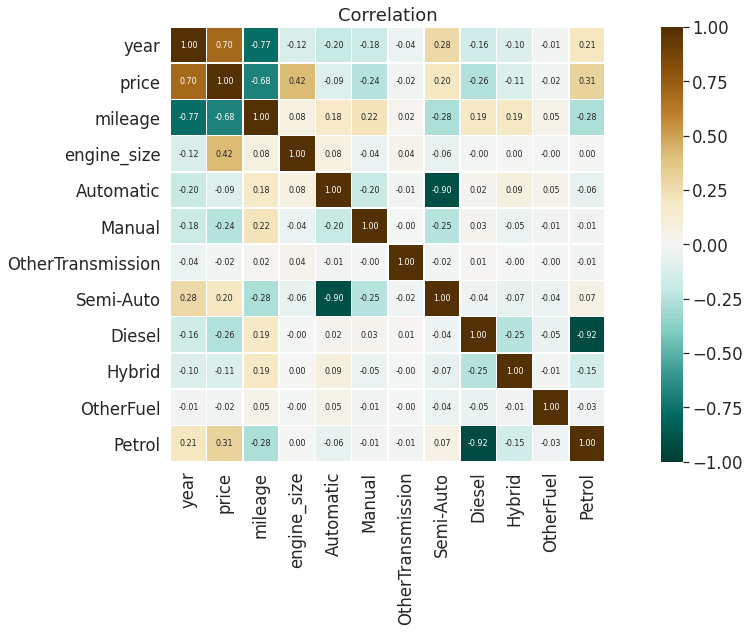

In [69]:
# finding correlation
corr = clean_df.corr()

# visualizing correlation with heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0,linewidth=.5,square=True, annot = True, annot_kws = {'size':8},fmt='.2f', cmap='BrBG_r')
plt.title('Correlation')
plt.savefig('correlation.png', dpi=400, bbox_inches='tight')
plt.show()

#### From the data visualization, we can make some inital hypothesis:
* The higher the mileage count, the lower the price will be. It's reasonable that car that has been riden longer distances (greater mialge count), will cheaper to purchase.
* The newer the car is (the more recent is its year of manufacte), the higher will be the cost.
* Tramission type Manuel can cause cars to be cheaper in the market whem compared to automatic and semi-auto types.
* Fuel Type is not signigicantly effect price of cars
* Car whose has big engine size will have a higher price



# 6. Training Models

### Useful Functions

Functions Created to be used for training comparison later

In [70]:
def plot_pred_act(y_pred, y_test):
    # plot the prediction vs actual(y test or ground truth)
    plt.scatter(y_pred, y_test, alpha=.7, color='b')
    plt.plot(y_test, y_test, color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Linear Regression Model')
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.show()
    
def print_metrics(rmse_train, r2_train, rmse_test, r2_test):
    print("The model performance for the training set")
    print("-------------------------------------------")
    print(f"RMSE of training set is {rmse_train:.3f}")
    print(f"R2 score of training set is {r2_train:.3f}")

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print(f"RMSE of test set is {rmse_test:.3f}")
    print(f"R2 score of test set is {r2_test:.3f}")

    print("The model plot for test set for predictions x actual prices")
    print("-------------------------------------------")
    
def regression_model(X_train, y_train, X_test, y_test, model, print_output=True, show_plot=True):
    """Generic function to train and measure performance of a regression model"""
    model.fit(X_train, y_train)
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
    r2_test = r2_score(y_test, y_test_predicted)

    if print_output:
        print_metrics(rmse_train, r2_train, rmse_test, r2_test)
    if show_plot:
        plot_pred_act(y_test_predicted, y_test)
    return rmse_train, r2_train, rmse_test, r2_test

def polynomial_regression_model(degree, X_train, Y_train, X_test, Y_test, model, print_output=True, show_plot=False):
    "generic function to creates a polynomial regression model for the given degree and X_train,Y_train, X_test, Y_test"

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    model.fit(X_train_poly, Y_train)

    # predicting on training data-set
    y_train_predicted = model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)

    if print_output:
        print_metrics(rmse_train, r2_train, rmse_test, r2_test)
    if show_plot:
        plot_pred_act(y_test_predict, Y_test)
    
    return rmse_train, r2_train, rmse_test, r2_test

def create_metrics(model_name, RMSE_train, R2_train, RMSE_test, R2_test, metrics=None):
    """create metrics to compare models"""
    if metrics is None:
        metrics = {"Model Name":[], "RMSE Train":[], "R2 Train":[], "RMSE Test":[], "R2 Test":[]}
    metrics["Model Name"].append(model_name)
    metrics["RMSE Train"].append(RMSE_train)
    metrics["R2 Train"].append(R2_train)
    metrics["RMSE Test"].append(RMSE_test)
    metrics["R2 Test"].append(R2_test)
    return metrics

### Splitting Dataset

Loading Cleaned CSV

In [71]:
# Constant Variables
SEED=42

In [72]:
#PATH = 'cleaned_data.csv'; df = pd.read_csv(PATH, index_col=0); df
PATH = 'cleaned_data_Group2.csv'; df = pd.read_csv(PATH); df

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700,Manual,31357.0,Diesel,1.6,0,1,0,0,1,0,0,0
3894,2018,18500,Automatic,28248.0,Diesel,2.1,1,0,0,0,1,0,0,0
3895,2014,11900,Manual,48055.0,Diesel,2.1,0,1,0,0,1,0,0,0
3896,2014,11300,Automatic,49865.0,Diesel,2.1,1,0,0,0,1,0,0,0


Selecting useful columns to be used as input: **indep_var** and to be predicted: **dep_var**


In [73]:
df['OtherFuel'].value_counts() # MAYBE WE CAN DROP IT

0    3892
1       6
Name: OtherFuel, dtype: int64

In [74]:
indep_var = ['year', 'mileage', 'engine_size', 'Automatic', 'Manual', 'OtherTransmission', # independent vars
        'Semi-Auto', 'Diesel', 'Hybrid', 'OtherFuel', 'Petrol']
dep_var = 'price' # dependent var

Split Train and Test sets chosen randomly, 20% full dataset for Test and 80% for Train

Splitting both **Train** and **Test** sets into **X** dependent and **y** the independent variables dataframes for each

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df[indep_var], df[dep_var], test_size=0.2, random_state = 42)

## 6.1 A Simple Linear Regression Model

In [76]:
# Creating linear regression object
regr = LinearRegression()
print("Linear Regression Model object Created")

Linear Regression Model object Created


In [77]:
# Training the Model
regr.fit(X_train, y_train)
print("Linear Regression Model Trained")

Linear Regression Model Trained


In [78]:
# getting the predictions on Test set
y_pred = regr.predict(X_test)
print("Predictions in Testset Calculated")

Predictions in Testset Calculated


In [79]:
regr.coef_

array([ 1.98542992e+03, -1.22859235e-01,  8.69999620e+03,  2.45406043e+03,
       -5.71964951e+02, -3.91231689e+03,  2.03022141e+03, -9.25112276e+02,
       -5.66615984e+02,  1.76023983e+02,  1.31570428e+03])

In [80]:
# Checking the Roots Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE is {mse**0.5}")

RMSE is 4677.9125960362735


In [81]:
# Checking the Score
r2 = regr.score(X_train, y_train)
print(f"R2 Train Score is {r2:.2f}\n")
r2 = regr.score(X_test, y_test)
print(f"R2 Test Score is {r2}\n")

R2 Train Score is 0.77

R2 Test Score is 0.7486994517738481



#### Comments: 
Considering that the R2 score is a metric that goes from 0 ( Bad ) to 1 (Best).
A score of 0.77 means that the model is ok, but A Linear model is the simplest model for prediction, let's try a better one.

Plotting the predictions vs actual prices

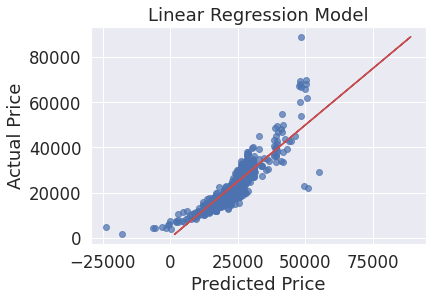

In [82]:
plot_pred_act(y_pred, y_test)

#### Comments:
Looking at the Plot we can see that somes minor cases get a negative predictions what is not realistic and the values are a little bit to the right,most are near the red line that would be the goal, a really linear model.

as We defined earlier we can run a linear regression model using the function above and what we will do for next models training

The model performance for the training set
-------------------------------------------
RMSE of training set is 4234.265
R2 score of training set is 0.771


The model performance for the test set
-------------------------------------------
RMSE of test set is 4677.913
R2 score of test set is 0.749
The model plot for test set for predictions x actual prices
-------------------------------------------


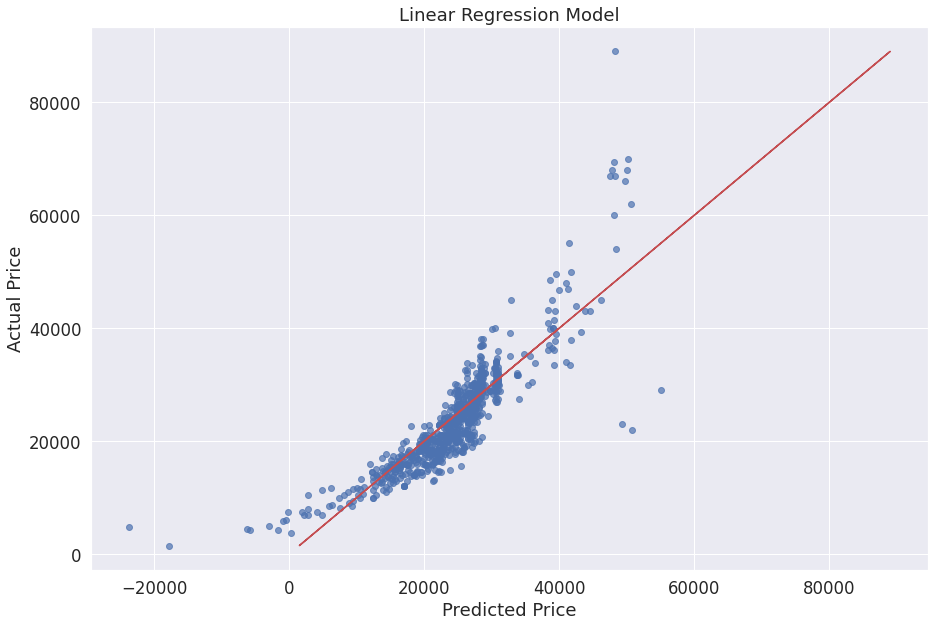

(4234.264582466823, 0.7714370409790907, 4677.9125960362735, 0.7486994517738481)

In [83]:
regr = LinearRegression()
regression_model(X_train, y_train, X_test, y_test, regr)

## 6.2 Linear Regression Model with Lasso/Ridge

### 6.2.1 Linear Regression Model with Lasso

In [84]:
# creating the Lasso object
clf_lasso = Lasso(alpha=0.1, random_state=SEED)
print("Linear Regression with Lasso  Model object Created")

Linear Regression with Lasso  Model object Created


In [85]:
clf_lasso.fit(X_train, y_train)
print("Linear Regression with Lasso  Model Trained")

Linear Regression with Lasso  Model Trained


In [86]:
# getting the predictions on Test set
y_pred = clf_lasso.predict(X_test)
print("Predictions in Testset Calculated")

Predictions in Testset Calculated


In [87]:
# Checking the Score
r2 = clf_lasso.score(X_train, y_train)
print(f"R2 Train Score is {r2:.2f}\n")
r2 = clf_lasso.score(X_test, y_test)
print(f"R2 Test Score is {r2}\n")

R2 Train Score is 0.77

R2 Test Score is 0.7487012216874669



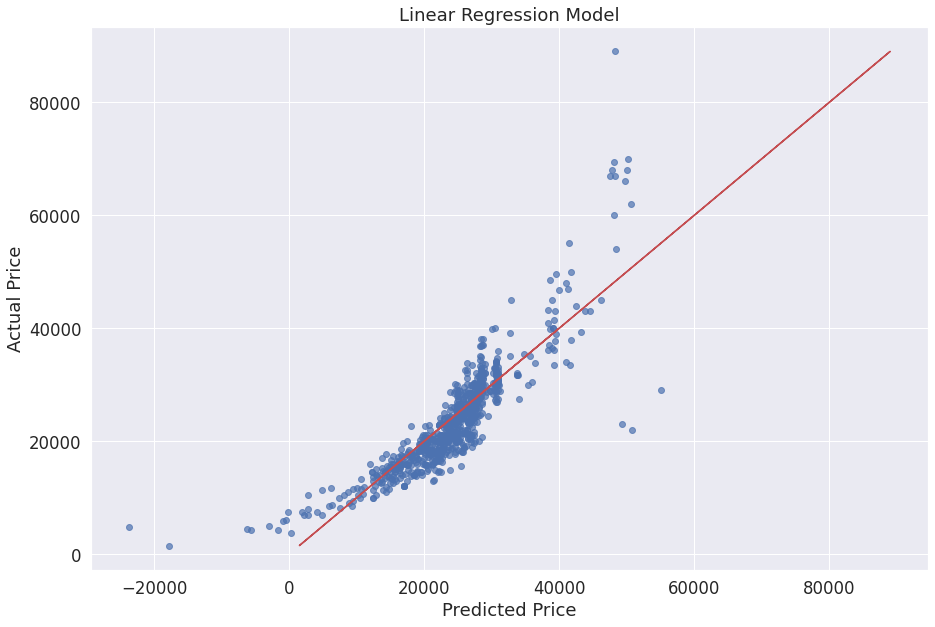

In [88]:
# plot the prediction vs actual
plot_pred_act(y_pred, y_test)

In [89]:
# Checking the Roots Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on Test Set is {rmse}")

RMSE on Test Set is 4677.896122702157


Comparing to the linear regression only, with lasso using alpha 0.1 the RMSE is almost the same, so we going to try to find a better alpha value

 Now let's run Lasso trying more parameters for alpha and check the results

In [90]:
alphas = np.linspace(0.001, 0.1, 10)
metrics = {"alpha":[], "RMSE Train":[], "R2 Train":[], "RMSE Test":[], "R2 Test":[]}
for alpha in alphas:
    #print(f"Lasso model alpha: {alpha}" )
    clf_lasso = Lasso(alpha=alpha, random_state=SEED)
    x, y, z, w = regression_model(X_train, y_train, X_test, y_test, clf_lasso, print_output=False, show_plot=False)
    metrics["alpha"].append(alpha)
    metrics["RMSE Train"].append(x)
    metrics["R2 Train"].append(y)
    metrics["RMSE Test"].append(z)
    metrics["R2 Test"].append(w)
pd.DataFrame(metrics)

,alpha,RMSE Train,R2 Train,RMSE Test,R2 Test
0,0.001,4234.264583,0.771437,4677.912430,0.748699
1,0.012,4234.264646,0.771437,4677.910608,0.748700
2,0.023,4234.264815,0.771437,4677.908788,0.748700
3,0.034,4234.265091,0.771437,4677.906971,0.748700
4,0.045,4234.265472,0.771437,4677.905158,0.748700
5,0.056,4234.265961,0.771437,4677.903345,0.748700
6,0.067,4234.266555,0.771437,4677.901535,0.748701
7,0.078,4234.267256,0.771437,4677.899730,0.748701
8,0.089,4234.268064,0.771437,4677.897925,0.748701
9,0.100,4234.268978,0.771437,4677.896123,0.748701


### 6.2.2 Linear Regression Model Ridge

Using the Ridge normalization let's test with some different alphas to understand which one can be a better one

In [91]:
alphas = np.linspace(0.01, 2, 20)
metrics = {"alpha":[], "RMSE Train":[], "R2 Train":[], "RMSE Test":[], "R2 Test":[]}
for alpha in alphas:
    #print(f"Lasso model alpha: {alpha}" )
    clf_ridge = Ridge(alpha=alpha, random_state=SEED)
    x, y, z, w = regression_model(X_train, y_train, X_test, y_test, clf_ridge, print_output=False, show_plot=False)
    metrics["alpha"].append(alpha)
    metrics["RMSE Train"].append(x)
    metrics["R2 Train"].append(y)
    metrics["RMSE Test"].append(z)
    metrics["R2 Test"].append(w)
pd.DataFrame(metrics)

,alpha,RMSE Train,R2 Train,RMSE Test,R2 Test
0,0.010000,4234.264640,0.771437,4677.914546,0.748699
1,0.114737,4234.271162,0.771436,4677.934856,0.748697
2,0.219474,4234.285540,0.771435,4677.954995,0.748695
3,0.324211,4234.304767,0.771433,4677.975007,0.748693
4,0.428947,4234.326898,0.771430,4677.994929,0.748691
5,0.533684,4234.350656,0.771428,4678.014790,0.748688
6,0.638421,4234.375202,0.771425,4678.034613,0.748686
7,0.743158,4234.399979,0.771422,4678.054417,0.748684
8,0.847895,4234.424622,0.771420,4678.074220,0.748682
9,0.952632,4234.448893,0.771417,4678.094033,0.748680


With the chart above we decide to use the alpha 0.01 for and check the results

The model performance for the training set
-------------------------------------------
RMSE of training set is 4234.265
R2 score of training set is 0.771


The model performance for the test set
-------------------------------------------
RMSE of test set is 4677.915
R2 score of test set is 0.749
The model plot for test set for predictions x actual prices
-------------------------------------------


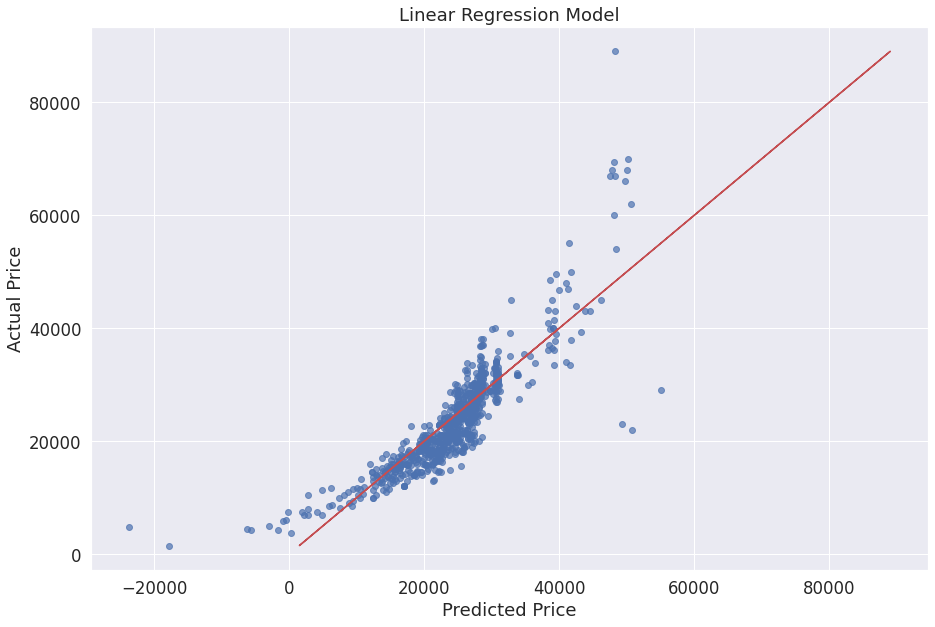

(4234.264640493447, 0.771437034714609, 4677.914546087781, 0.7486992422576997)

In [92]:
regression_model(X_train, y_train, X_test, y_test, Ridge(alpha=0.01, random_state=SEED))

## 6.3 Polynomial Regression Model (with Lasso/Ridge)

The reason to use a Polynomial regression model is because the problem is not linear and can't capture the pattern well using linear model, so a way to increase the complexity of the model is to have a higher order polynom, the way we can do this is to add powers of the original features.

First we create a PolynomialFeatures object setting the prefered polynom degree, let' start with order 2

In [93]:
poly_features = PolynomialFeatures(degree=2)

Now the features are transformed to a higher degree values and then can be fit

In [94]:
# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

In [95]:
# fit the transformed features to Linear Regression
regr = LinearRegression()
regr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predictions on test and training set

In [96]:
# predicting on training data-set
y_train_predicted = regr.predict(X_train_poly)
# predicting on test data-set
y_test_predict = regr.predict(poly_features.fit_transform(X_test))

Evaluation to be done

In [97]:
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

The model performance for the training set
-------------------------------------------
RMSE of training set is 3194.565
R2 score of training set is 0.870


The model performance for the test set
-------------------------------------------
RMSE of test set is 3417.557
R2 score of test set is 0.866
The model plot for test set for predictions x actual prices
-------------------------------------------


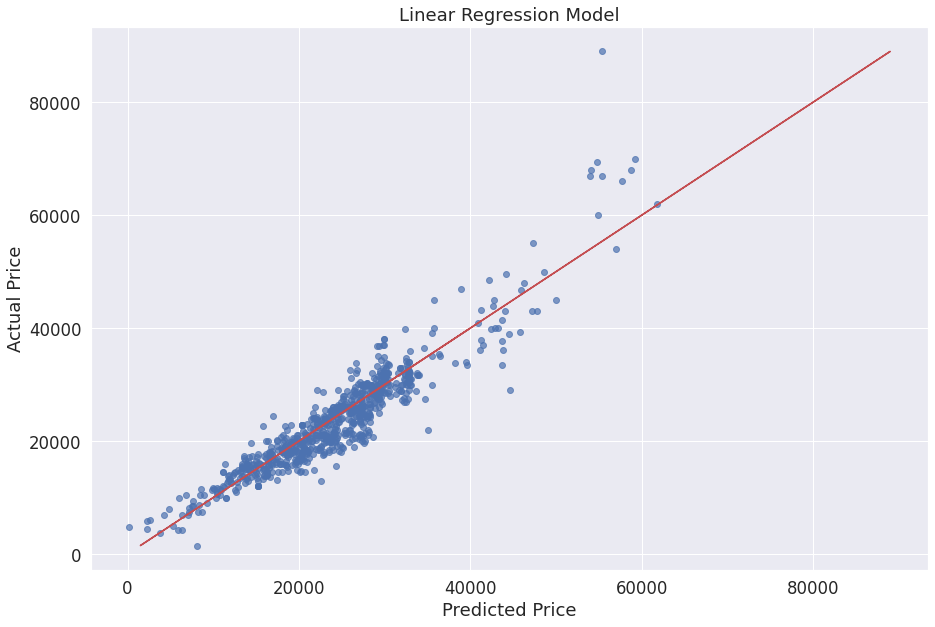

In [98]:
print_metrics(rmse_train, r2_train, rmse_test, r2_test)
plot_pred_act(y_test_predict, y_test)

Using polynomial of degree 2 we can see that gives a better result than previous linear models,
RMSE of 3417 and
R2 Score of 0.86 in Test Set
let's keep increasing the deegree ans see what happens...

#### let's try different deegrees examples and compare the results.

Degree = 3

The model performance for the training set
-------------------------------------------
RMSE of training set is 2969.974
R2 score of training set is 0.888


The model performance for the test set
-------------------------------------------
RMSE of test set is 3293.276
R2 score of test set is 0.875
The model plot for test set for predictions x actual prices
-------------------------------------------


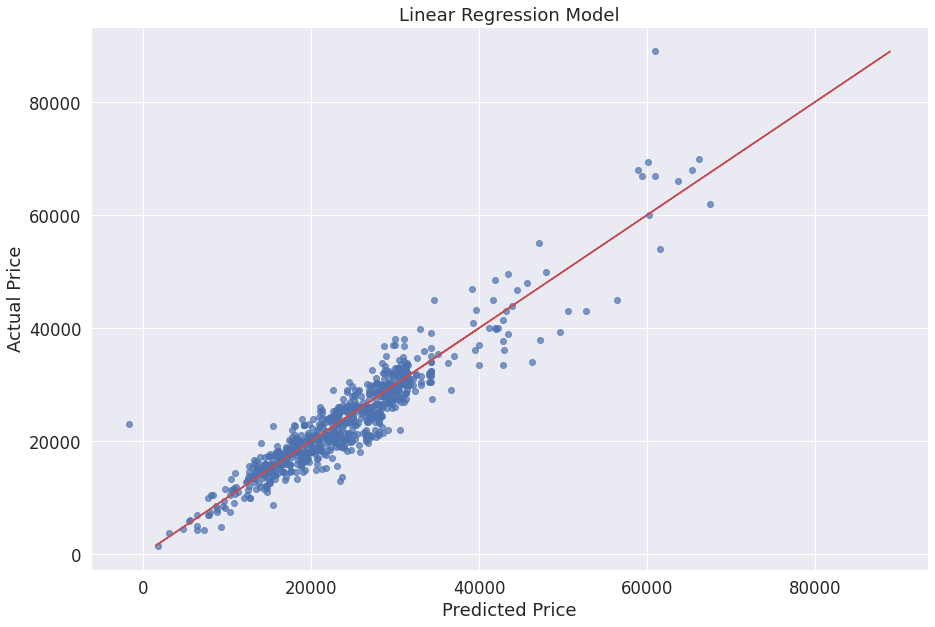

(2969.974152794757, 0.8875511015102767, 3293.2756354532376, 0.8754495238203931)

In [99]:
regr = LinearRegression()
polynomial_regression_model(3, X_train, y_train, X_test, y_test, regr, show_plot=True)

#### Comments:
We can see that using a Degree of 3 gives a much better result that the previous polynomial deegree = 2 model.
What happens if we keep increading the deegree of polynom?

Let's see Degree = 4

In [100]:
regr = LinearRegression()
polynomial_regression_model(4, X_train, y_train, X_test, y_test, regr)

The model performance for the training set
-------------------------------------------
RMSE of training set is 2816.554
R2 score of training set is 0.899


The model performance for the test set
-------------------------------------------
RMSE of test set is 3039.691
R2 score of test set is 0.894
The model plot for test set for predictions x actual prices
-------------------------------------------


(2816.553537054257, 0.8988686306977078, 3039.691217647048, 0.8938919905442952)

Using Degree 4 we can see that perfoemance on test set get worse then degree 3, so let's try 5 jus to be shure if it will continue to get worse

In [101]:
regr = LinearRegression()
polynomial_regression_model(5, X_train, y_train, X_test, y_test, regr)

The model performance for the training set
-------------------------------------------
RMSE of training set is 3010.874
R2 score of training set is 0.884


The model performance for the test set
-------------------------------------------
RMSE of test set is 3366.898
R2 score of test set is 0.870
The model plot for test set for predictions x actual prices
-------------------------------------------


(3010.8740406355855, 0.8844326803953392, 3366.898208952554, 0.8698185204203486)

With degree 5 it got worse in test and even on training compared to degree 4 so it's not a good idea 

#### Comments:
Using a polynom deegre 4 we reach a different situation, the RMSE on training was improved compared to the degree=3 model, but the RMSE on test set decreased comparing to the deegree=3 model which tell us that this model is overffiting and if we keep increasing the deegre, it will improve perfoemance on training set but decrease on test set!

The conslusion using the polynomial is that the degree = 3 fits better than other models

### Polynomial model with Lasso 

Now that we checked that Polynomial fits better our problem, let's try doing it with Lasso and Ridge normalization

For Lasso we going to try for each degree polynom using alpha 0.01 as we saw previously it's as a good one

In [102]:
metrics = {"Degree":[], "RMSE Train":[], "R2 Train":[], "RMSE Test":[], "R2 Test":[]}
for degree in [1, 2, 3, 4, 5,  6, 7 ]:
    x, y, z, w = polynomial_regression_model(degree, X_train, y_train, X_test, y_test, Lasso(alpha=0.01, random_state=SEED), print_output=False, show_plot=False)
    metrics["Degree"].append(degree)
    metrics["RMSE Train"].append(x)
    metrics["R2 Train"].append(y)
    metrics["RMSE Test"].append(z)
    metrics["R2 Test"].append(w)
pd.DataFrame(metrics)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17774214133.340218, tolerance: 24458298.70941428
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13496272572.476791, tolerance: 24458298.70941428
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12773231062.833336, tolerance: 24458298.70941428
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124927358

,Degree,RMSE Train,R2 Train,RMSE Test,R2 Test
0,1,4234.264626,0.771437,4677.910939,0.748700
1,2,3376.265515,0.854681,3714.004489,0.841593
2,3,2941.871606,0.889669,3198.907872,0.882485
3,4,2862.093440,0.895572,2994.610251,0.897016
4,5,2830.531541,0.897862,2934.914624,0.901081
5,6,2807.624707,0.899509,2919.759738,0.902100
6,7,2791.270972,0.900676,3018.981820,0.895333


Using Polynomial with Lasso we can see that we increased our results using degree 6

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12291495637.398073, tolerance: 24458298.70941428
  positive)


The model performance for the training set
-------------------------------------------
RMSE of training set is 2807.625
R2 score of training set is 0.900


The model performance for the test set
-------------------------------------------
RMSE of test set is 2919.760
R2 score of test set is 0.902
The model plot for test set for predictions x actual prices
-------------------------------------------


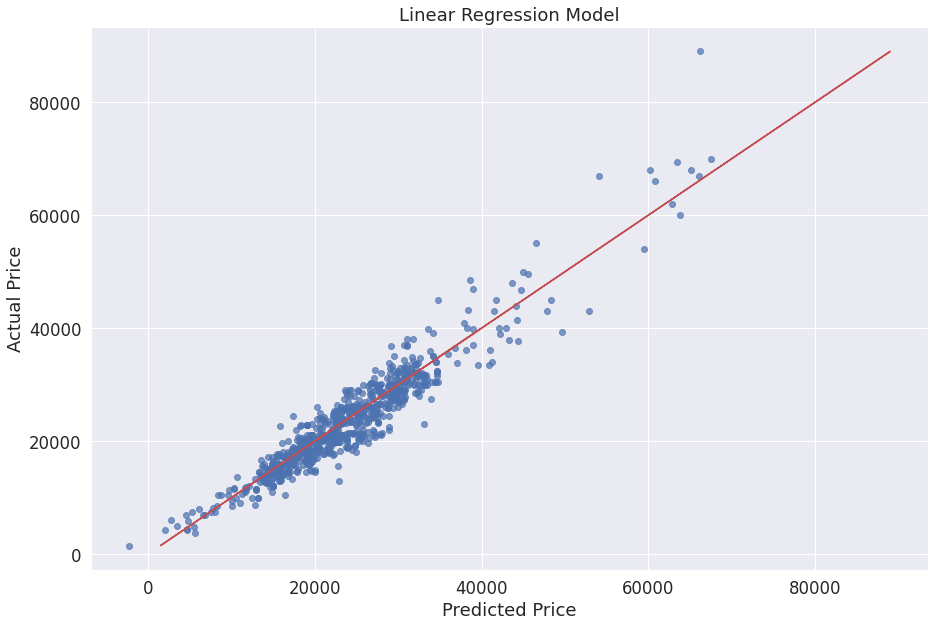

(2807.624706834986, 0.8995088127688416, 2919.759737738944, 0.9020998265911347)

In [103]:
polynomial_regression_model(6, X_train, y_train, X_test, y_test, Lasso(alpha=0.01, random_state=SEED), show_plot=True)

### Polynomial Model With Ridge

Let's do a similar try with Ridge Normalization

First let's understand how the Polynomial with Ridge will behave will some different alphas chosen empirically

First alpha = 0.01

In [104]:
metrics = {"Degree":[], "RMSE Train":[], "R2 Train":[], "RMSE Test":[], "R2 Test":[]}
for degree in [1, 2, 3, 4, 5]:
    x, y, z, w = polynomial_regression_model(degree, X_train, y_train, X_test, y_test, Ridge(alpha=0.01, random_state=SEED), print_output=False, show_plot=False)
    metrics["Degree"].append(degree)
    metrics["RMSE Train"].append(x)
    metrics["R2 Train"].append(y)
    metrics["RMSE Test"].append(z)
    metrics["R2 Test"].append(w)
pd.DataFrame(metrics)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.49234e-25): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


,Degree,RMSE Train,R2 Train,RMSE Test,R2 Test
0,1,4234.264640,0.771437,4677.914546,0.748699
1,2,3223.996730,0.867493,3514.983929,0.858115
2,3,2850.762615,0.896397,2988.339155,0.897447
3,4,2972.014591,0.887397,3269.518666,0.877240
4,5,6102.582394,0.525237,6890.805087,0.454708


Now Alpha = 0.1

In [105]:
metrics = {"Degree":[], "RMSE Train":[], "R2 Train":[], "RMSE Test":[], "R2 Test":[]}
for degree in [1, 2, 3, 4, 5, 6]:
    x, y, z, w = polynomial_regression_model(degree, X_train, y_train, X_test, y_test, Ridge(alpha=0.1, random_state=SEED), print_output=False, show_plot=False)
    metrics["Degree"].append(degree)
    metrics["RMSE Train"].append(x)
    metrics["R2 Train"].append(y)
    metrics["RMSE Test"].append(z)
    metrics["R2 Test"].append(w)
pd.DataFrame(metrics)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.38261e-24): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


,Degree,RMSE Train,R2 Train,RMSE Test,R2 Test
0,1,4234.269683,0.771436,4677.932010,0.748697
1,2,3230.650862,0.866945,3526.572142,0.857178
2,3,2850.025249,0.896451,2988.014888,0.897469
3,4,2972.014578,0.887397,3269.518649,0.877240
4,5,6102.582394,0.525237,6890.805087,0.454708
5,6,6626.734125,0.440179,7477.785678,0.357852


For Last alpha = 10

In [106]:
metrics = {"Degree":[], "RMSE Train":[], "R2 Train":[], "RMSE Test":[], "R2 Test":[]}
for degree in [1, 2, 3, 4, 5, 6]:
    x, y, z, w = polynomial_regression_model(degree, X_train, y_train, X_test, y_test, Ridge(alpha=10, random_state=SEED), print_output=False, show_plot=False)
    metrics["Degree"].append(degree)
    metrics["RMSE Train"].append(x)
    metrics["R2 Train"].append(y)
    metrics["RMSE Test"].append(z)
    metrics["R2 Test"].append(w)
pd.DataFrame(metrics)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.71237e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


,Degree,RMSE Train,R2 Train,RMSE Test,R2 Test
0,1,4235.564758,0.771297,4680.138456,0.748460
1,2,3234.044365,0.866666,3532.031871,0.856736
2,3,2847.608134,0.896626,2996.318779,0.896898
3,4,2972.014590,0.887397,3269.518567,0.877240
4,5,6102.582394,0.525237,6890.805087,0.454708
5,6,6626.734125,0.440179,7477.785678,0.357852


As we can se above, changing the alpha the best model was always the Polynom degree 3
So let's keep it and select a better alpha

In [107]:
alphas = np.linspace(0.1, 40, 20)
metrics = {"Alpha":[], "RMSE Train":[], "R2 Train":[], "RMSE Test":[], "R2 Test":[]}
for alpha in alphas:
    x, y, z, w = polynomial_regression_model(3, X_train, y_train, X_test, y_test, Ridge(alpha=alpha, random_state=SEED), print_output=False, show_plot=False)
    metrics["Alpha"].append(alpha)
    metrics["RMSE Train"].append(x)
    metrics["R2 Train"].append(y)
    metrics["RMSE Test"].append(z)
    metrics["R2 Test"].append(w)
pd.DataFrame(metrics)

,Alpha,RMSE Train,R2 Train,RMSE Test,R2 Test
0,0.1,2850.025249,0.896451,2988.014888,0.897469
1,2.2,2847.417560,0.896640,2990.679820,0.897286
2,4.3,2847.398739,0.896641,2992.929257,0.897132
3,6.4,2847.448153,0.896638,2994.446264,0.897027
4,8.5,2847.531232,0.896632,2995.615059,0.896947
5,10.6,2847.642373,0.896624,2996.577093,0.896881
6,12.7,2847.774962,0.896614,2997.397207,0.896824
7,14.8,2847.922916,0.896603,2998.111026,0.896775
8,16.9,2848.081382,0.896592,2998.740965,0.896732
9,19.0,2848.246717,0.896580,2999.302561,0.896693


With the initial run we saw a lower RMSE aroung 12, let's do again with a smaller range

In [108]:
alphas = np.linspace(11, 13, 10)
metrics = {"Alpha":[], "RMSE Train":[], "R2 Train":[], "RMSE Test":[], "R2 Test":[]}
for alpha in alphas:
    x, y, z, w = polynomial_regression_model(3, X_train, y_train, X_test, y_test, Ridge(alpha=alpha, random_state=SEED), print_output=False, show_plot=False)
    metrics["Alpha"].append(alpha)
    metrics["RMSE Train"].append(x)
    metrics["R2 Train"].append(y)
    metrics["RMSE Test"].append(z)
    metrics["R2 Test"].append(w)
pd.DataFrame(metrics)

,Alpha,RMSE Train,R2 Train,RMSE Test,R2 Test
0,11.000000,2847.666173,0.896622,2996.742900,0.896869
1,11.222222,2847.679715,0.896621,2996.832926,0.896863
2,11.444444,2847.693476,0.896620,2996.921536,0.896857
3,11.666667,2847.707448,0.896619,2997.008731,0.896851
4,11.888889,2847.721614,0.896618,2997.094606,0.896845
5,12.111111,2847.735987,0.896617,2997.179172,0.896839
6,12.333333,2847.750544,0.896616,2997.262461,0.896833
7,12.555556,2847.765286,0.896615,2997.344526,0.896828
8,12.777778,2847.780195,0.896614,2997.425390,0.896822
9,13.000000,2847.795281,0.896613,2997.505069,0.896817


As preety much the same, lets choose Alpha = 12

So for Polynom using Ridge We Chose Degree = 3 and Alpha = 12

The model performance for the training set
-------------------------------------------
RMSE of training set is 2847.729
R2 score of training set is 0.897


The model performance for the test set
-------------------------------------------
RMSE of test set is 2997.137
R2 score of test set is 0.897
The model plot for test set for predictions x actual prices
-------------------------------------------


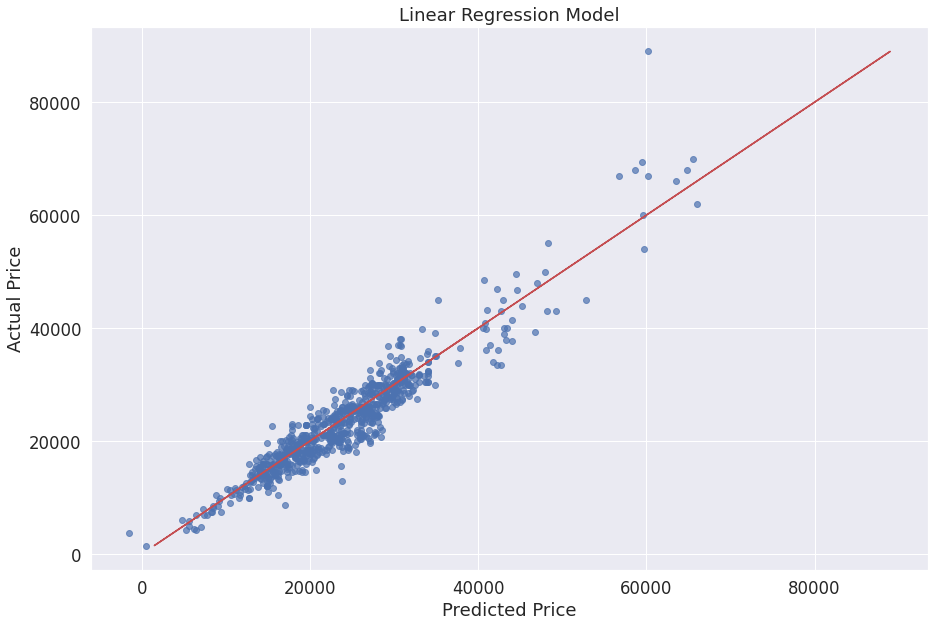

(2847.7287792937395,
 0.8966174798692355,
 2997.1370472132535,
 0.8968421139275609)

In [109]:
polynomial_regression_model(3, X_train, y_train, X_test, y_test, Ridge(alpha=12, random_state=SEED), show_plot=True)

### Let's compare our Best Models with our cleaned dataset to the project standard cleaned dataset

Loading Data our dataset

In [110]:
df = pd.read_csv('cleaned_data_Group2.csv')

indep_var = ['year', 'mileage', 'engine_size', 'Automatic', 'Manual', 'OtherTransmission', # independent vars
        'Semi-Auto', 'Diesel', 'Hybrid', 'OtherFuel', 'Petrol']
dep_var = 'price' # dependent var

X_train, X_test, y_train, y_test = train_test_split(df[indep_var], df[dep_var], test_size=0.2, random_state = 42)

x, y, z, w = regression_model(X_train, y_train, X_test, y_test, LinearRegression(), print_output=False, show_plot=False)
metrics = create_metrics("Lin Reg", x, y, z, w)
x, y, z, w = polynomial_regression_model(6, X_train, y_train, X_test, y_test, Lasso(alpha=0.01, random_state=SEED), print_output=False)
metrics = create_metrics("Poly Lasso", x, y, z, w, metrics)
x, y, z, w = polynomial_regression_model(3, X_train, y_train, X_test, y_test, Ridge(alpha=12, random_state=SEED), print_output=False)
metrics = create_metrics("Poly Ridge", x, y, z, w, metrics)

print('Best Models using our dataset')
pd.DataFrame(metrics)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12291495637.398073, tolerance: 24458298.70941428
  positive)


Best Models using our dataset


,Model Name,RMSE Train,R2 Train,RMSE Test,R2 Test
0,Lin Reg,4234.264582,0.771437,4677.912596,0.748699
1,Poly Lasso,2807.624707,0.899509,2919.759738,0.902100
2,Poly Ridge,2847.728779,0.896617,2997.137047,0.896842


In [111]:
df = pd.read_csv('cleaned_data.csv', index_col=0)

indep_var = ['year', 'mileage', 'engineSize', 'Automatic', 'Manual', 'OtherTransmission', # independent vars
        'Semi-Auto', 'Diesel', 'Hybrid', 'OtherFuel', 'Petrol']
dep_var = 'price' # dependent var

X_train, X_test, y_train, y_test = train_test_split(df[indep_var], df[dep_var], test_size=0.2, random_state = 42)

x, y, z, w = regression_model(X_train, y_train, X_test, y_test, LinearRegression(), print_output=False, show_plot=False)
metrics = create_metrics("Lin Reg", x, y, z, w)
x, y, z, w = polynomial_regression_model(6, X_train, y_train, X_test, y_test, Lasso(alpha=0.01, random_state=SEED), print_output=False)
metrics = create_metrics("Poly Lasso", x, y, z, w, metrics)
x, y, z, w = polynomial_regression_model(3, X_train, y_train, X_test, y_test, Ridge(alpha=12, random_state=SEED), print_output=False)
metrics = create_metrics("Poly Ridge", x, y, z, w, metrics)

print('Best Models using Project DataSet')
pd.DataFrame(metrics)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12366637028.76181, tolerance: 24490550.04888086
  positive)


Best Models using Project DataSet


,Model Name,RMSE Train,R2 Train,RMSE Test,R2 Test
0,Lin Reg,4309.030191,0.763530,4404.295476,0.777605
1,Poly Lasso,2815.706058,0.899030,3058.904019,0.892724
2,Poly Ridge,2873.414197,0.894849,2912.275088,0.902762


## Report Conclusion and Summary Table

In [112]:
%%html
<style>
table {margin-left: 0 !important;}
</style>

| Regression Model | Parameters Used | RMSE | R^2 |
| :-----------: | :----------- | :----------- | :----------- |
| Simple Linear Regression | 80% Train, 20% Test | 4677.91 | 0.77 |
| Linear Regression + Lasso | Alpha= 0.1 | 4677.89 | 0.77 |
| Linear Regression + Ridge| Alpha= 0.01 | 4234.265 | 0.771 |
| Polynomial Regression | Degree 3 | 2977.989 | 0.887 |
| Polynomial + Lasso| Alpha= 0.01, Degree 6 | 2807.625 | 0.900 |
| Polynomial + Ridge | Alpha= 12, Degree 3 | 2846.107 | 0.897 |

  For the Simple Regression Model the train and test datasets were split into 80 and 20 percent, along with the rest of the models. As observed above, the best performing model was the Polynomial Regression with Lasso resulting in the lowest rooted error score of only 2807.62 and a R^2 of 0.900. The comparison among the other model results gives us greater assertiveness to believe that the model would not be overfitting do to the small alpha parameter used in the Polynomial with Lasso, once in the Plynomial with Ridge the alpha parameter used was much bigger and did not represent a relevant change in the accuracy results.
    Overall, the initial hypothesis was confirmed possible to predict the price value of a used car in the UK through the use of the selected variables in this dataset. Even though the Simple linear regresion initialy performing on a R^2 of 0.77 it demonstrated that the set of variables were statistically significant, and that at least 77% of the variation in the price value could be explained by this dataset. With the additional models and different trys of parameters we were able to obtain a better performance.